**All imports**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

**Load and visualize data**

In [9]:
full_prices_df = pd.read_csv("california_housing")

full_prices_df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [85]:
full_prices_df.shape

(20640, 10)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

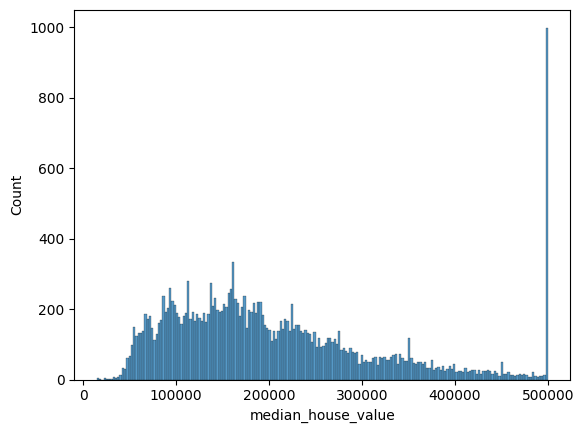

In [18]:
sns.histplot(full_prices_df["median_house_value"], bins=200)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

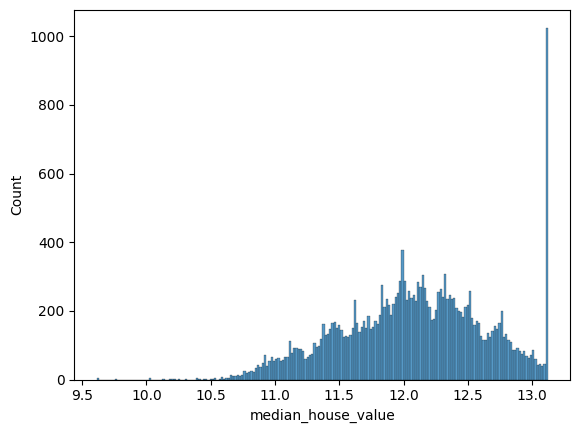

In [23]:
median_prices_log = np.log1p(full_prices_df["median_house_value"])

sns.histplot(median_prices_log, bins=200)

It looks like median_house_value has a long tail

In [28]:
ocean_proximity_filter = full_prices_df["ocean_proximity"].isin(["<1H OCEAN", "INLAND"])

filtered_prices_df = full_prices_df[ocean_proximity_filter]
filtered_prices_df = filtered_prices_df[["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

filtered_prices_df.head(5)

latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
701     37.64    -121.97                32.0       1283.0           194.0   
830     37.61    -121.99                 9.0       3666.0           711.0   
859     37.57    -121.97                21.0       4342.0           783.0   
860     37.58    -121.96                15.0       3575.0           597.0   
861     37.58    -121.98                20.0       4126.0          1031.0   

     population  households  median_income  median_house_value  
701       485.0       171.0         6.0574            431000.0  
830      2341.0       703.0         4.6458            217000.0  
859      2172.0       789.0         4.6146            247600.0  
860      1777.0       559.0         5.7192            283500.0  
861      2079.0       975.0         3.6832            216900.0

In [86]:
filtered_prices_df.shape

(15687, 9)

# Question 1

In [38]:
filtered_prices_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms column has missing values

# Question 2

In [42]:
filtered_prices_df["population"].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

Median for variable population is 1195

**Randomly shuffle dataset**

In [90]:
filtered_prices_df.reset_index(drop=True, inplace=True)

number_of_records = filtered_prices_df.shape[0]

indexes = np.arange(number_of_records)

np.random.seed(42)
np.random.shuffle(indexes)

filtered_prices_df = filtered_prices_df.iloc[indexes]
filtered_prices_df

latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
15183     34.15    -117.30                38.0        740.0           163.0   
4469      41.54    -122.38                14.0       4453.0           797.0   
9316      38.16    -121.22                24.0       4411.0           776.0   
4983      38.44    -121.34                14.0       3205.0           465.0   
13154     34.07    -117.18                 7.0       1347.0           301.0   
...         ...        ...                 ...          ...             ...   
5191      34.17    -118.43                42.0        777.0           102.0   
13418     34.01    -118.06                34.0       1962.0           396.0   
5390      40.97    -124.01                21.0       1513.0           319.0   
860       33.95    -118.25                48.0       1766.0           424.0   
7270      35.06    -119.40                21.0       2213.0           458.0   

       population  households  median_income  median_house_value  
15183       332.0       138.0         2.4107             88000.0  
4469       1817.0       685.0         2.7468             81100.0  
9316       2038.0       732.0         3.4750            151200.0  
4983       1439.0       456.0         5.7452            240900.0  
13154       799.0       276.0         2.9485            112500.0  
...           ...         ...            ...                 ...  
5191        284.0       113.0        11.2093            500001.0  
13418      1488.0       332.0         3.9091            155100.0  
5390        943.0       301.0         3.5380            102700.0  
860        1655.0       420.0         0.9751             95500.0  
7270       1250.0       440.0         2.9187             52100.0  

[15687 rows x 9 columns]

**Split test data**

In [120]:
def get_features_and_prediction(data):
    y = data["median_house_value"].to_numpy()
    y = np.log1p(y)
    X = data.drop("median_house_value", axis="columns")

    return X, y

In [144]:
from dataclasses import dataclass

@dataclass
class DataRecord:
    X: pd.DataFrame
    y: np.array


@dataclass
class Data:
    train: DataRecord
    validation: DataRecord
    test: DataRecord
    

def split_data(data_to_split):
    train_records_count = int(data_to_split.shape[0] * 0.6)
    validation_records_count = int(data_to_split.shape[0] * 0.2)
    
    train_data = data_to_split[:train_records_count]
    validation_data = data_to_split[train_records_count:train_records_count + validation_records_count]
    test_data = data_to_split[train_records_count + validation_records_count:]
    
    train_X, train_y = get_features_and_prediction(train_data)
    validation_X, validation_y = get_features_and_prediction(validation_data)
    test_X, test_y = get_features_and_prediction(test_data)

    return Data(
        DataRecord(train_X, train_y),
        DataRecord(validation_X, validation_y),
        DataRecord(test_X, test_y),
    )

In [145]:
splitted_data = split_data(filtered_prices_df)

print(splitted_data.train.X.shape[0])
print(splitted_data.validation.X.shape[0])
print(splitted_data.test.X.shape[0])

total_records_count = splitted_data.train.X.shape[0] + splitted_data.validation.X.shape[0] + splitted_data.test.X.shape[0]

print(f"Total records count before split is = {filtered_prices_df.shape[0]}")
print(f"Total records count after split is = {total_records_count}")

9412
3137
3138
Total records count before split is = 15687
Total records count after split is = 15687


**Linear regression method**

In [153]:
def train_model(data: DataRecord):
    XTX = data.X.T.dot(data.X) 
    XTX_inverse = np.linalg.inv(XTX)
    w = XTX_inverse.dot(data.X.T).dot(data.y)

    return w
    

In [157]:
def split_with_filling_na(basic_df, na_value):
    updated_df = basic_df.copy()
    updated_df["total_bedrooms"] = updated_df["total_bedrooms"].fillna(na_value)
    
    return split_data(updated_df)

In [156]:
def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [164]:
average_bedrooms = filtered_prices_df["total_bedrooms"].mean()

spliited_with_average_as_na_df = split_with_filling_na(filtered_prices_df, average_bedrooms)
spliited_with_zero_as_na_df = split_with_filling_na(filtered_prices_df, 0)

w_average_as_na = train_model(spliited_with_average_as_na_df.train)
w_zero_as_na = train_model(spliited_with_zero_as_na_df.train)

print(w_average_as_na)
print(w_zero_as_na)


[-1.83449166e-01 -1.48252995e-01  2.72423763e-03 -4.36643679e-05
  2.94114820e-04 -1.69373378e-04  4.85234624e-04  1.92355435e-01]
[-1.84169429e-01 -1.48556112e-01  2.68157055e-03 -3.72569594e-05
  2.01509672e-04 -1.73491632e-04  5.62212924e-04  1.90313652e-01]


In [166]:
y_pred_average_as_na_df = spliited_with_average_as_na_df.validation.X.dot(w_average_as_na)
y_pred_zero_as_na_df = spliited_with_zero_as_na_df.validation.X.dot(w_zero_as_na)

# print(y_pred_average_as_na_df)
# print(y_pred_zero_as_na_df)


# QUESTION 3

In [169]:
rmse_average_as_na = rmse(spliited_with_average_as_na_df.validation.y, y_pred_average_as_na_df)
rmse_zero_as_na = rmse(spliited_with_zero_as_na_df.validation.y, y_pred_zero_as_na_df)

print(f"rmse for average as na is = {rmse_average_as_na.round(2)} and rmse for zero as na is = {rmse_zero_as_na.round(2)}")


rmse for average as na is = 0.36 and rmse for zero as na is = 0.36


Looks like both variants are equally good